In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle

import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn.preprocessing import StandardScaler

from time import time

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans

import math


#### The dataset is quit huge and conatins nearly 4Lakh data with 784 dimensions for each. Training such a huge set takes a lot of RAM memory and time. Hence we will be using randomly selected 70000 datapoints

In [ ]:
df = pd.read_csv('letters_data.csv', low_memory = False, chunksize = 10000)
pd_df = pd.concat(df)
pd_df.shape

df = shuffle(pd_df)

temp = df.iloc[:70000,:]
temp.rename(columns={'0':'label'}, inplace=True)

In [ ]:
temp

#### We segregate the data into input features and corresponding output label where 0 represents 'A', 1 represents 'B' and so on

In [ ]:
temp.to_csv('Samp1.csv')

In [2]:
X_new = pd.read_csv('Samp1.csv')
X_new.shape
X_new

,Unnamed: 0,label,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,151389,14,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,65411,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,171075,14,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,19777,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,240063,18,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,94569,10,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,324507,20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,113614,12,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,173631,14,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# X_new = temp
Y = X_new['label']
X = X_new.drop('label',axis=1)
# index = X['Unnamed: 0']
X = X.drop('Unnamed: 0',axis=1)

In [4]:
X

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
index

0        151389
1         65411
2        171075
3         19777
4        240063
          ...  
69995     94569
69996    324507
69997    113614
69998    173631
69999    157719
Name: Unnamed: 0, Length: 70000, dtype: int64

In [6]:
Y

0        14
1         4
2        14
3         1
4        18
         ..
69995    10
69996    20
69997    12
69998    14
69999    14
Name: label, Length: 70000, dtype: int64

#### Plotting the first 45 images to identify with 784 dimensions

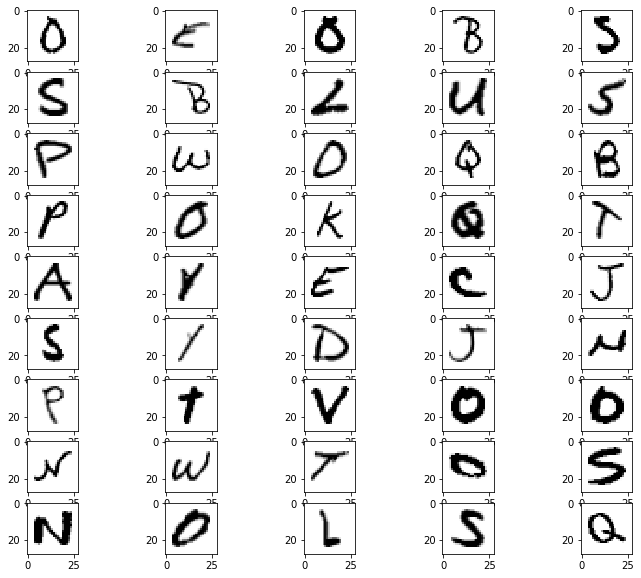

In [7]:
plt.figure(figsize = (12,10))
rows, columns = 9, 5
for i in range(45):  
    plt.subplot(rows, columns, i+1)
    plt.imshow(X.iloc[i].values.reshape(28,28),interpolation='nearest', cmap='Greys')
plt.show()

#### Splitting the training and testing dataset with test size = 0.1%

### Applying KNN on the data without preprocessing took a lot of time and hence feature extraction is done using PCA 
#### For K values between 1 and 13, the algorithm took nearly 7 minutes to complete



## PCA Dimensionality Reduction

The data is normalised first before reducing the features. Here, we reduce the dimensions from 28 * 28 (784) to 7 * 7 (49)

In [8]:
# Normalising the data 
x = StandardScaler().fit_transform(X)
x.shape

(70000, 784)

In [94]:
pca = PCA(n_components=49)
principalComponents = pca.fit_transform(x)
principalDf30 = pd.DataFrame(data = principalComponents)

Alpha_PCA = pd.concat([principalDf30], axis = 1)
Alpha_PCA.shape

(70000, 49)

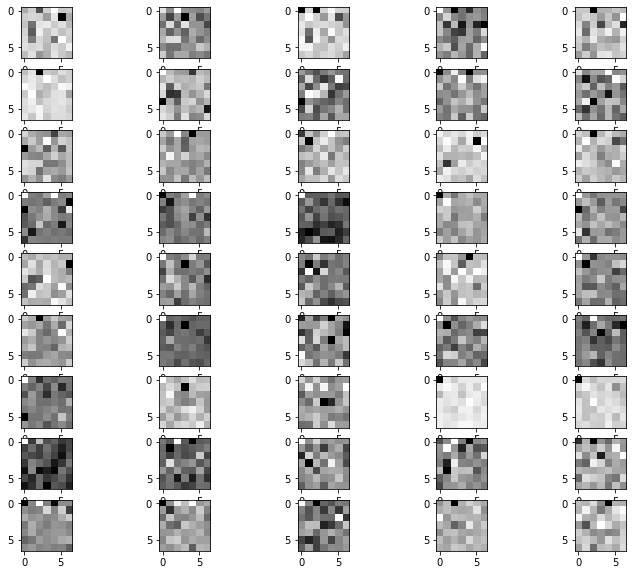

In [95]:
plt.figure(figsize = (12,10))
rows, columns = 9, 5
for i in range(45):  
    plt.subplot(rows, columns, i+1)
    plt.imshow(Alpha_PCA.iloc[i].values.reshape(7,7),interpolation='nearest', cmap='Greys')
plt.show()

#### Inverse transformation is performed on the images and this is the final look of images with reduced dimensions. We observe that though the image is slightly blurred, we still can get a good information from it

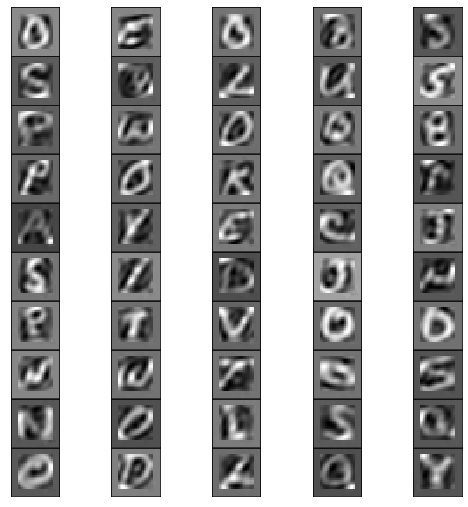

In [96]:
components = pca.transform(x)
projected = pca.inverse_transform(components)
fig, axes = plt.subplots(10,5,figsize=(9,9), subplot_kw={'xticks':[], 'yticks':[]},
            gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(projected[i].reshape(28,28),cmap="gray")

In [97]:
X_PCA_train, X_PCA_test, Y_PCA_train, Y_PCA_test = train_test_split(Alpha_PCA,Y,test_size=0.1)
# X_train.shape, X_test.shape

X_PCA_train = X_PCA_train.to_numpy()
Y_PCA_train = Y_PCA_train.to_numpy()
X_PCA_test = X_PCA_test.to_numpy()
Y_PCA_test = Y_PCA_test.to_numpy()

print(X_PCA_train.shape,Y_PCA_train.shape)

(63000, 49) (63000,)


In [98]:
print(type(X_PCA_train),type(Y_PCA_train),type(X_PCA_test),type(Y_PCA_test))
# Y_train_label = Y_PCA_train[:,0:1]

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


The images now have only 49 dimensions

## KNN - EUCLIDEAN DISTANCE

In [21]:
# find the value of k that has the largest accuracy

kVals = range(1,11,1)
accuracies = []

# loop over various values of `k` for the k-Nearest Neighbor classifier

for k in range(1,11,1):
    # train the k-Nearest Neighbor classifier with the current value of `k`
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_PCA_train, Y_PCA_train)
    # evaluate the model and update the accuracies list
    score = model.score(X_PCA_test,Y_PCA_test)
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))
    accuracies.append(score*100)
    

k=1, accuracy=94.97%
k=2, accuracy=94.09%
k=3, accuracy=94.64%
k=4, accuracy=94.53%
k=5, accuracy=94.54%
k=6, accuracy=94.40%
k=7, accuracy=94.34%
k=8, accuracy=94.56%
k=9, accuracy=94.09%
k=10, accuracy=94.20%


#### We find the value of K which gives the best score and use it for testing data

In [22]:
max_accuracy = -1
for i in range(2,len(accuracies)):
    if accuracies[i]>max_accuracy:
        max_accuracy = accuracies[i]
        pos_max = i
print("k=%d achieved highest accuracy of %.2f%% on validation data" % (pos_max+1,max_accuracy))

model = KNeighborsClassifier(n_neighbors=pos_max+1)
model.fit(X_PCA_train, Y_PCA_train)
predictions = model.predict(X_PCA_test)

k=3 achieved highest accuracy of 94.64% on validation data


<class 'list'> <class 'range'>


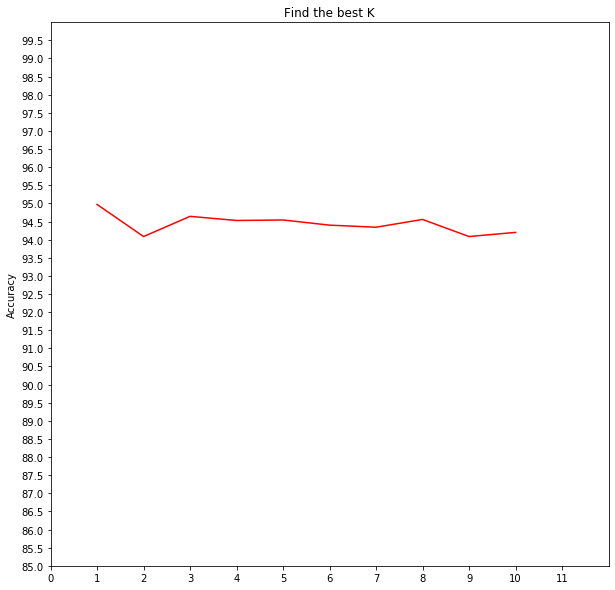

In [61]:
fig, ax = plt.subplots(figsize = (10,10))

# print(type(accuracies),type(kVals))
plt.plot(kVals,accuracies,'red')
plt.axis([0,12,85,100])

plt.xticks(np.arange(0,12,1))
plt.yticks(np.arange(85,100,0.5))

plt.ylabel('K')
plt.ylabel('Accuracy')
plt.title('Find the best K')
plt.show()     

In [64]:
from sklearn.model_selection import cross_val_score
cross_val_score = cross_val_score(model, Alpha_PCA, Y, cv=5)

<class 'numpy.ndarray'> (5, 1) [[93.90714286]
 [93.80714286]
 [94.32857143]
 [93.94285714]
 [94.04285714]]


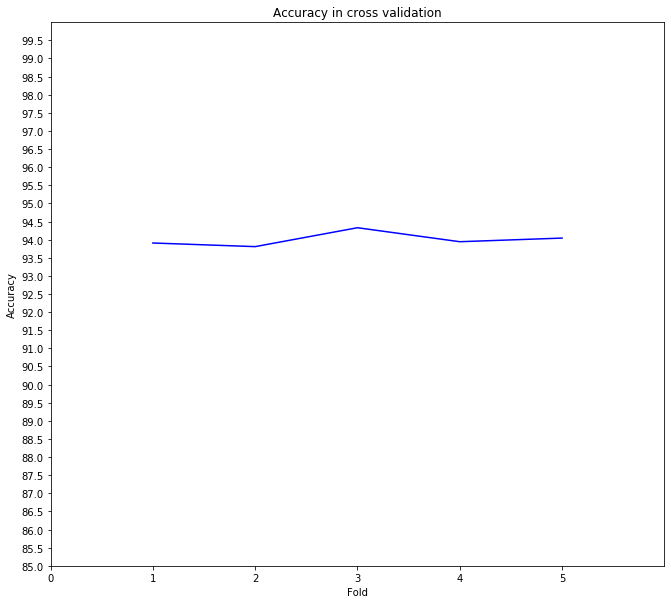

In [90]:
print(type(cross_val_score),cross_val_score.shape,cross_val_score*100)

fig, ax = plt.subplots(figsize = (11,10))

plt.plot(cv,cross_val_score*100,'blue')
plt.axis([0,6,85,100])

plt.xticks(np.arange(0,6,1))
plt.yticks(np.arange(85,100,0.5))

plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy in cross validation')
plt.show()    

In [38]:
print("EVALUATION ON TESTING DATA")
print(classification_report(Y_PCA_test, predictions))
# t = classification_report(Y_PCA_test, predictions,output_dict=True)

EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       271
           1       0.93      0.87      0.90       169
           2       0.95      0.97      0.96       400
           3       0.93      0.86      0.90       177
           4       0.91      0.87      0.89       178
           5       0.77      0.85      0.81        20
           6       0.96      0.85      0.90       110
           7       0.85      0.91      0.88       139
           8       1.00      0.90      0.95        20
           9       0.93      0.89      0.91       177
          10       0.86      0.86      0.86       101
          11       0.93      0.98      0.95       231
          12       0.98      0.96      0.97       246
          13       0.93      0.93      0.93       359
          14       0.96      0.99      0.97      1062
          15       0.95      0.96      0.95       352
          16       0.94      0.81      0.87       107


#### Confusion Matrix

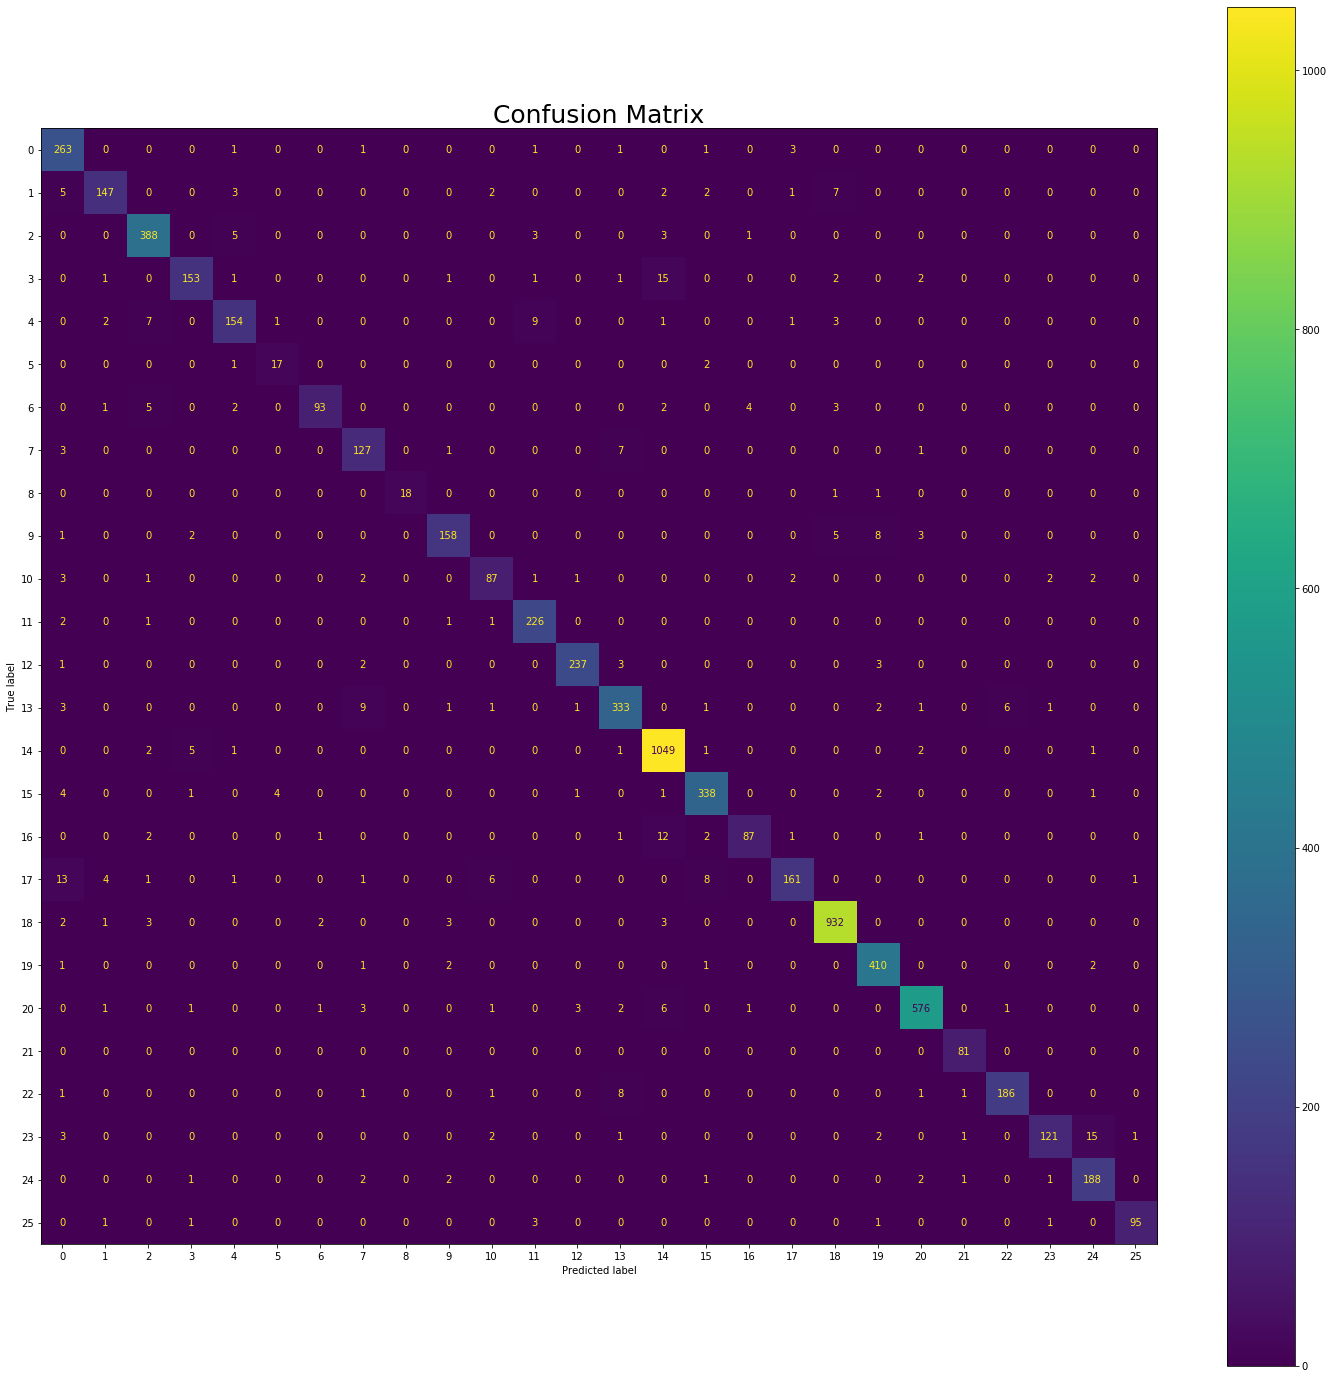

In [39]:
fig, ax = plt.subplots(figsize = (25,25))
title_font = {'size':'25'}  # Adjust to fit
ax.set_title('Confusion Matrix', fontdict=title_font)
plot_confusion_matrix(model,X_PCA_test, Y_PCA_test, ax=ax, normalize=None, values_format='d')
# plt.title('Confusion Matrix')
plt.show()

#### Testing on random data

The actual alphabet is: S
The predicted alphabet is: S


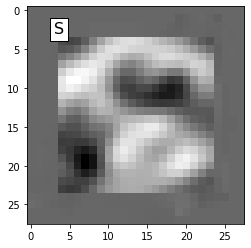

The actual alphabet is: O
The predicted alphabet is: O


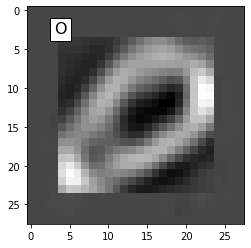

The actual alphabet is: U
The predicted alphabet is: U


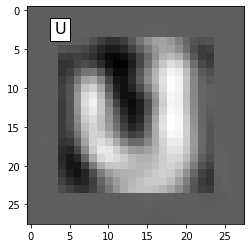

The actual alphabet is: I
The predicted alphabet is: I


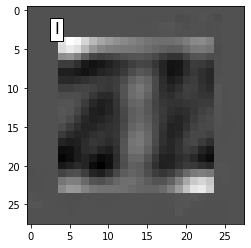

The actual alphabet is: O
The predicted alphabet is: O


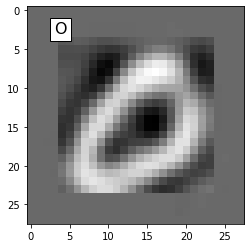

The actual alphabet is: N
The predicted alphabet is: N


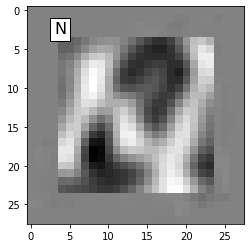

The actual alphabet is: N
The predicted alphabet is: N


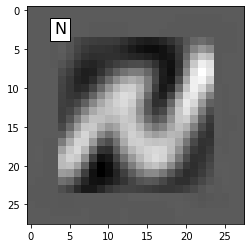

The actual alphabet is: W
The predicted alphabet is: W


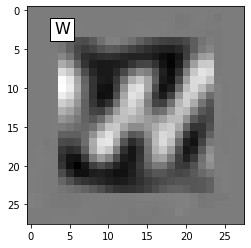

The actual alphabet is: T
The predicted alphabet is: T


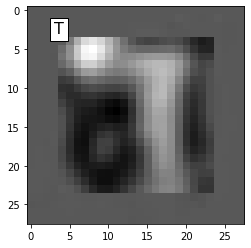

The actual alphabet is: O
The predicted alphabet is: D


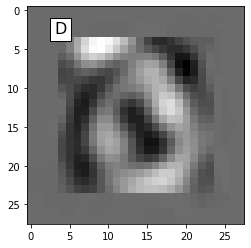

The actual alphabet is: R
The predicted alphabet is: R


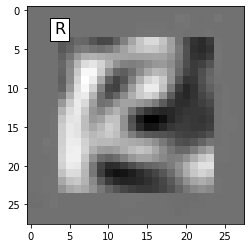

The actual alphabet is: Y
The predicted alphabet is: Y


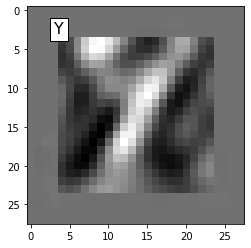

The actual alphabet is: T
The predicted alphabet is: T


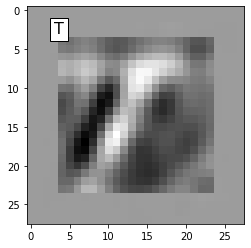

The actual alphabet is: U
The predicted alphabet is: U


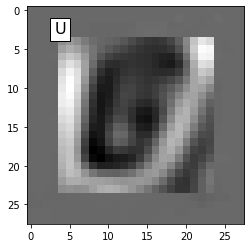

The actual alphabet is: W
The predicted alphabet is: W


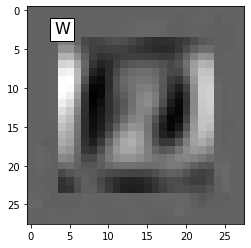

The actual alphabet is: R
The predicted alphabet is: A


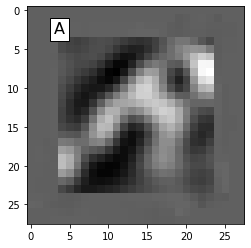

The actual alphabet is: A
The predicted alphabet is: A


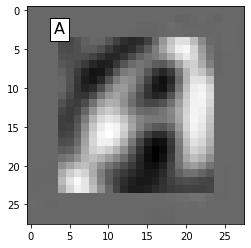

The actual alphabet is: S
The predicted alphabet is: S


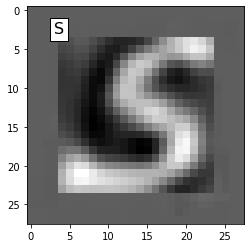

The actual alphabet is: O
The predicted alphabet is: O


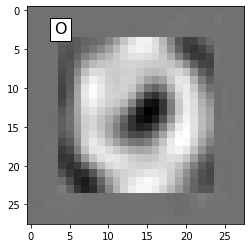

The actual alphabet is: H
The predicted alphabet is: H


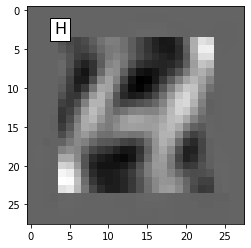

The actual alphabet is: U
The predicted alphabet is: U


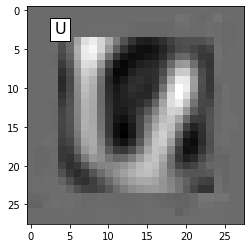

The actual alphabet is: C
The predicted alphabet is: C


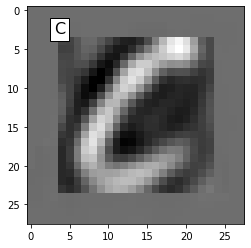

The actual alphabet is: D
The predicted alphabet is: D


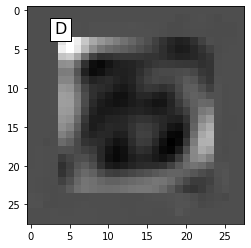

The actual alphabet is: T
The predicted alphabet is: T


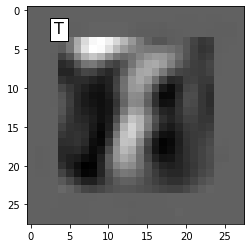

The actual alphabet is: O
The predicted alphabet is: O


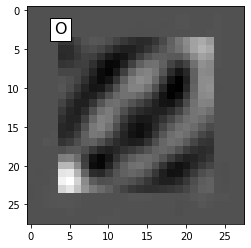

The actual alphabet is: V
The predicted alphabet is: V


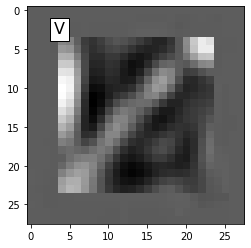

The actual alphabet is: W
The predicted alphabet is: W


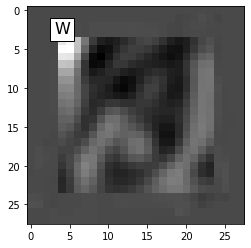

The actual alphabet is: O
The predicted alphabet is: O


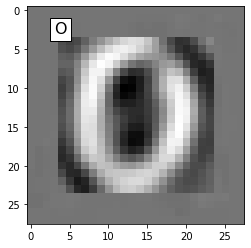

The actual alphabet is: P
The predicted alphabet is: P


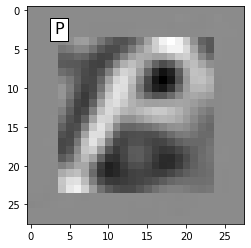

The actual alphabet is: B
The predicted alphabet is: B


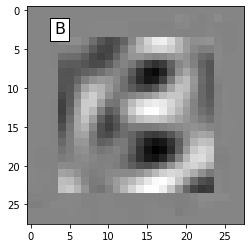

The actual alphabet is: N
The predicted alphabet is: N


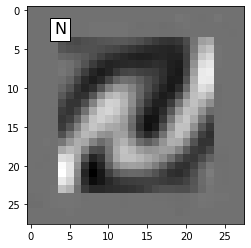

The actual alphabet is: N
The predicted alphabet is: N


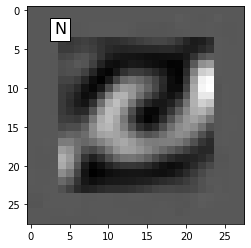

The actual alphabet is: T
The predicted alphabet is: T


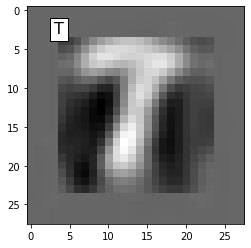

The actual alphabet is: S
The predicted alphabet is: S


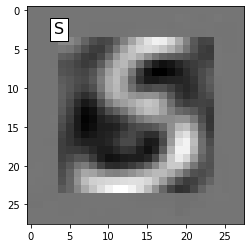

The actual alphabet is: U
The predicted alphabet is: U


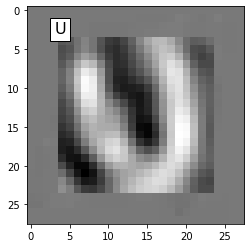

The actual alphabet is: H
The predicted alphabet is: J


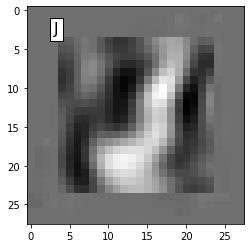

The actual alphabet is: E
The predicted alphabet is: E


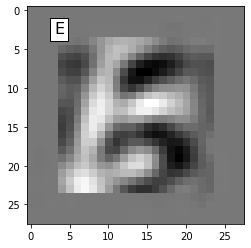

The actual alphabet is: S
The predicted alphabet is: S


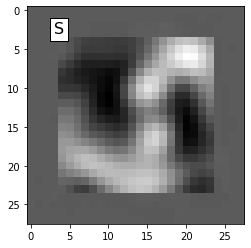

The actual alphabet is: O
The predicted alphabet is: O


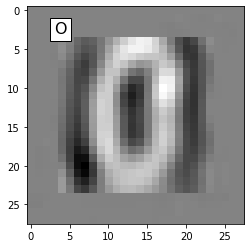

The actual alphabet is: U
The predicted alphabet is: U


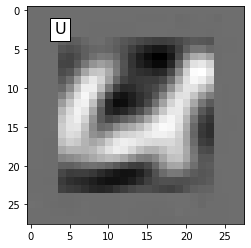

The actual alphabet is: D
The predicted alphabet is: D


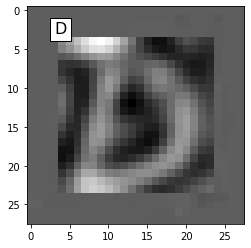

The actual alphabet is: D
The predicted alphabet is: D


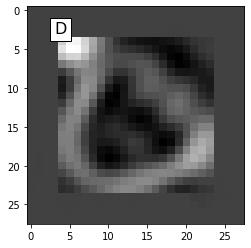

The actual alphabet is: E
The predicted alphabet is: E


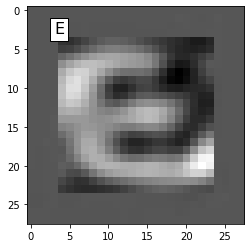

The actual alphabet is: E
The predicted alphabet is: E


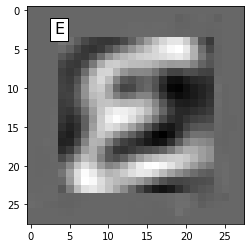

The actual alphabet is: C
The predicted alphabet is: C


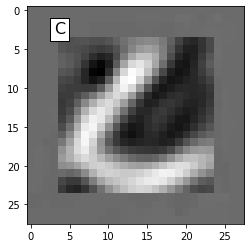

The actual alphabet is: N
The predicted alphabet is: N


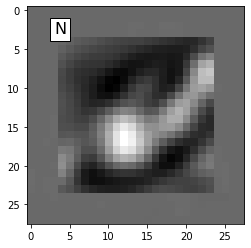

The actual alphabet is: O
The predicted alphabet is: O


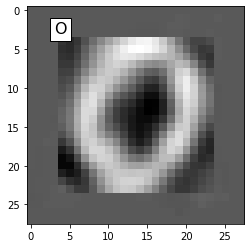

The actual alphabet is: O
The predicted alphabet is: O


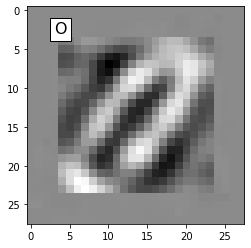

The actual alphabet is: S
The predicted alphabet is: S


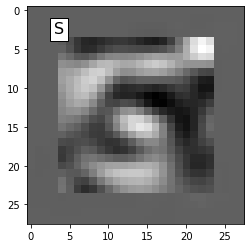

The actual alphabet is: N
The predicted alphabet is: N


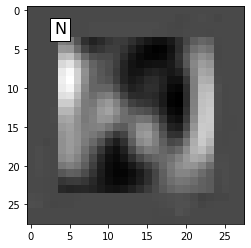

In [106]:
error = 0
for i in np.random.randint(0, high=len(Y_PCA_test), size=(50,)):
    # grab the image and classify it
#     print(i,Y_PCA_test[i],Y_test[i])
    image = X_PCA_test[i]
    image2 = pca.inverse_transform(image)

    ans = Y_PCA_test[i]
    image = image.reshape(1,-1)
    ans = ans.reshape(1,-1)
    prediction = model.predict(image)[0]
    
    imgdata = np.array(image, dtype='float')

    if prediction != ans:
        error += 1
        
    pixels = image2.reshape(28,28)
    plt.imshow(pixels,cmap='gray')
    plt.annotate(chr(prediction+65),(3,3),bbox={'facecolor':'white'},fontsize=16)
    print("The actual alphabet is: {}".format(chr(ans[0]+65)))
    print("The predicted alphabet is: {}".format(chr(prediction+65)))

    plt.show()


In [107]:
print('Testing on ranodm 50 samples yielded: ', (50-error)*2.0)

Testing on ranodm 50 samples yielded:  94.0


## Cosine similarity training

In [41]:
from sklearn.metrics.pairwise import cosine_similarity
import heapq
def cos_knn_training(k, test_data, test_target, stored_data, stored_target):
        
    # find similarity for every point in test_data between every other point in stored_data
    cosim = cosine_similarity(test_data, stored_data)
    
    # get indices of images in stored_data that are most similar to any given test_data point
    top = [(heapq.nlargest((k+1), range(len(i)), i.take)) for i in cosim]
    # convert indices to numbers
    top = [[ stored_target[j] for j in i[:k]] for i in top]
    
    # vote, and return prediction for every image in test_data
    pred = [max(set(i), key=i.count) for i in top]
    pred = np.array(pred)
    
    # print table giving classifier accuracy using test_target
    t = classification_report(test_target, pred,output_dict=True)
    
    return t['accuracy']

## Cosine similarity testing

In [42]:
def cos_knn_testing(k, test_data, test_target, stored_data, stored_target):
    
    # find similarity for every point in test_data between every other point in stored_data
    cosim = cosine_similarity(test_data, stored_data)
    
    # get indices of images in stored_data that are most similar to any given test_data point
    top = [(heapq.nlargest((k+1), range(len(i)), i.take)) for i in cosim]
    # convert indices to numbers
    top = [[ stored_target[j] for j in i[:k]] for i in top]
    
    # vote, and return prediction for every image in test_data
    pred = [max(set(i), key=i.count) for i in top]
    pred = np.array(pred)
    
    return pred

## Testing using cosine similarity K=3

In [43]:
cos_knn_training(3, X_PCA_test, Y_PCA_test, X_PCA_train[:50000,:], Y_PCA_train[:50000])

0.9362857142857143

The actual alphabet is: O
The predicted alphabet is: O


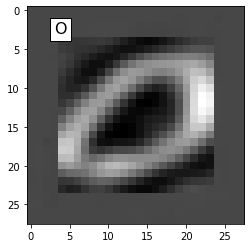

The actual alphabet is: S
The predicted alphabet is: S


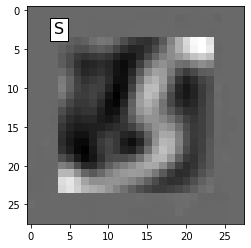

The actual alphabet is: O
The predicted alphabet is: O


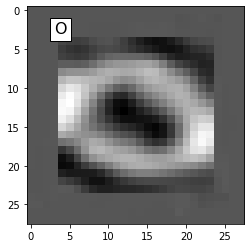

The actual alphabet is: G
The predicted alphabet is: G


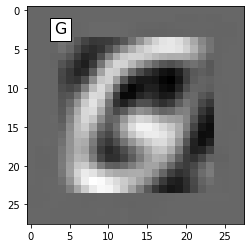

The actual alphabet is: T
The predicted alphabet is: T


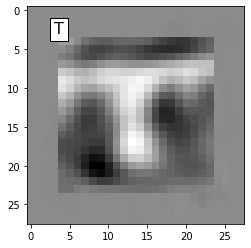

The actual alphabet is: S
The predicted alphabet is: S


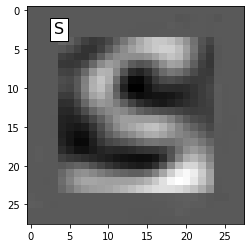

The actual alphabet is: H
The predicted alphabet is: H


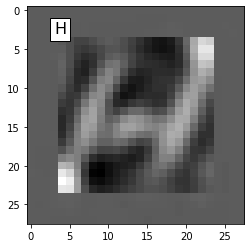

The actual alphabet is: O
The predicted alphabet is: O


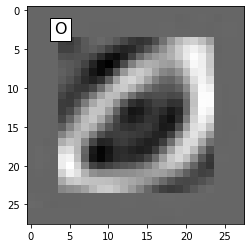

The actual alphabet is: C
The predicted alphabet is: C


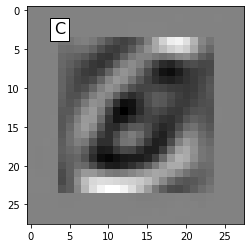

The actual alphabet is: U
The predicted alphabet is: U


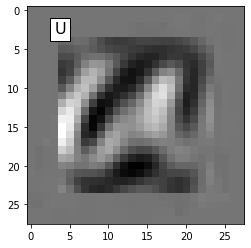

The actual alphabet is: Q
The predicted alphabet is: Q


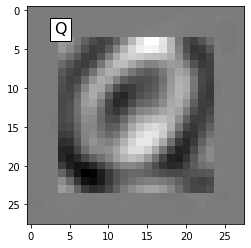

The actual alphabet is: Z
The predicted alphabet is: Z


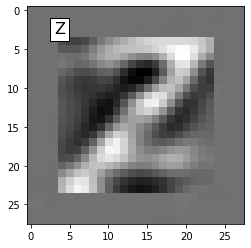

The actual alphabet is: U
The predicted alphabet is: U


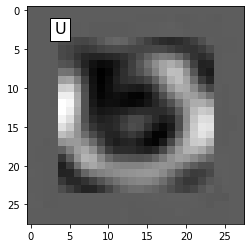

The actual alphabet is: Y
The predicted alphabet is: Y


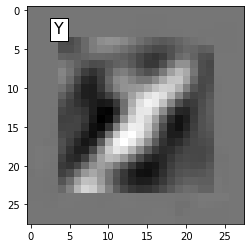

The actual alphabet is: N
The predicted alphabet is: N


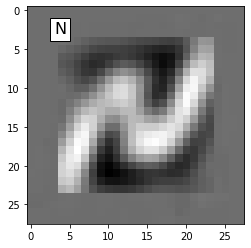

The actual alphabet is: E
The predicted alphabet is: E


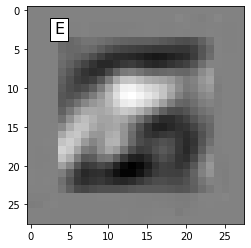

The actual alphabet is: E
The predicted alphabet is: E


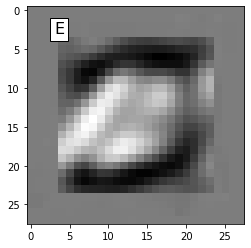

The actual alphabet is: S
The predicted alphabet is: S


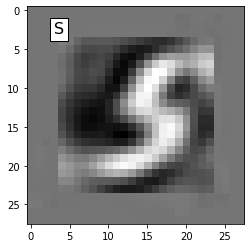

The actual alphabet is: T
The predicted alphabet is: T


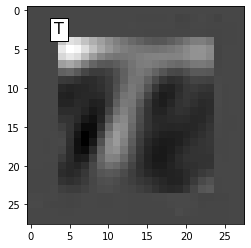

The actual alphabet is: P
The predicted alphabet is: P


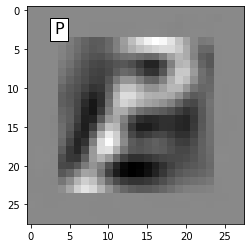

The actual alphabet is: M
The predicted alphabet is: M


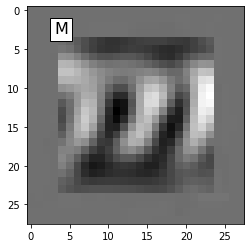

The actual alphabet is: U
The predicted alphabet is: U


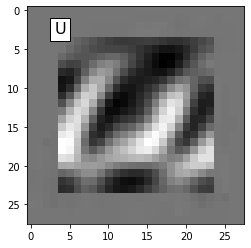

The actual alphabet is: S
The predicted alphabet is: S


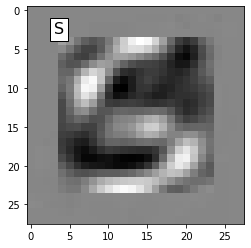

The actual alphabet is: L
The predicted alphabet is: L


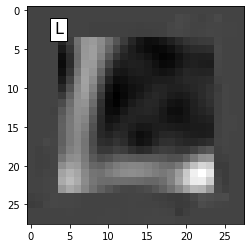

The actual alphabet is: K
The predicted alphabet is: K


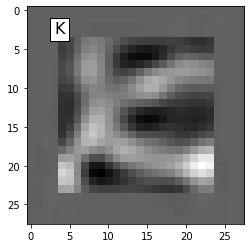

The actual alphabet is: C
The predicted alphabet is: C


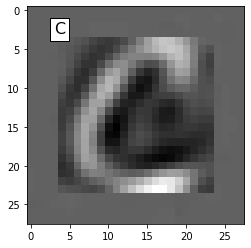

The actual alphabet is: W
The predicted alphabet is: W


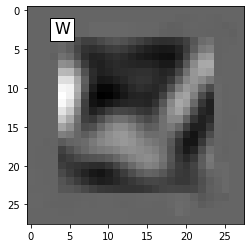

The actual alphabet is: T
The predicted alphabet is: T


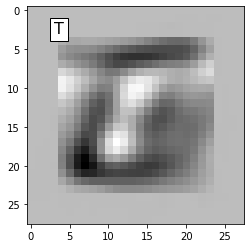

The actual alphabet is: O
The predicted alphabet is: O


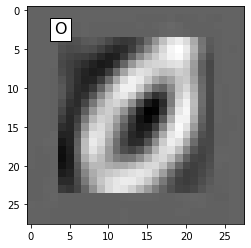

The actual alphabet is: B
The predicted alphabet is: B


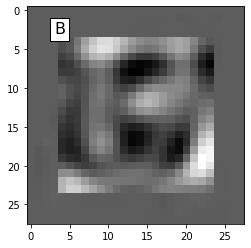

The actual alphabet is: P
The predicted alphabet is: P


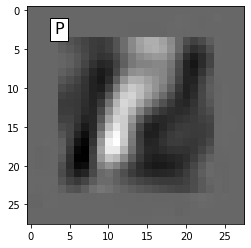

The actual alphabet is: P
The predicted alphabet is: P


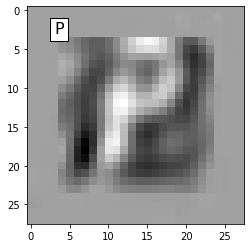

The actual alphabet is: O
The predicted alphabet is: O


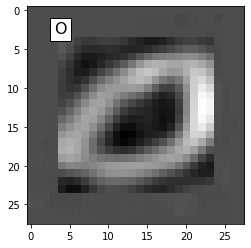

The actual alphabet is: A
The predicted alphabet is: A


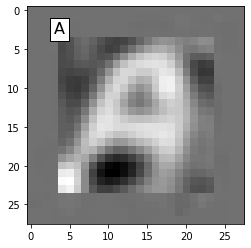

The actual alphabet is: N
The predicted alphabet is: N


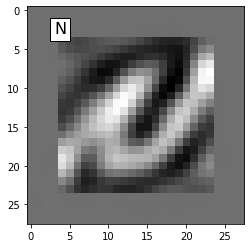

The actual alphabet is: S
The predicted alphabet is: S


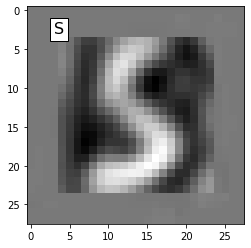

The actual alphabet is: L
The predicted alphabet is: L


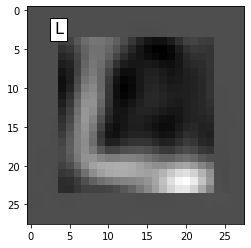

The actual alphabet is: A
The predicted alphabet is: A


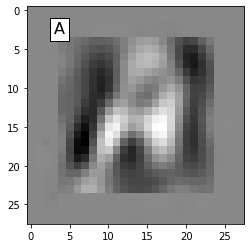

The actual alphabet is: U
The predicted alphabet is: U


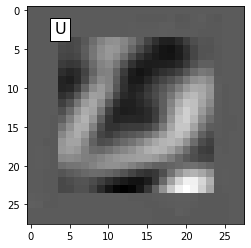

The actual alphabet is: N
The predicted alphabet is: N


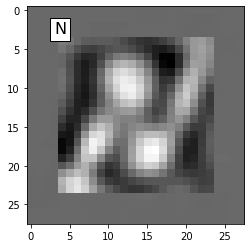

The actual alphabet is: P
The predicted alphabet is: N


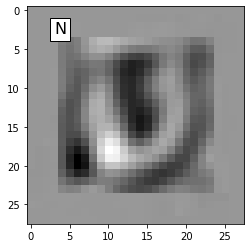

The actual alphabet is: P
The predicted alphabet is: P


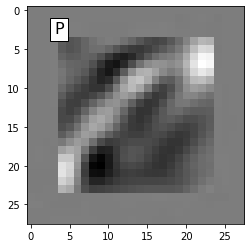

The actual alphabet is: C
The predicted alphabet is: C


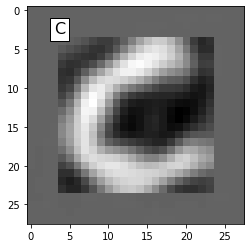

The actual alphabet is: E
The predicted alphabet is: C


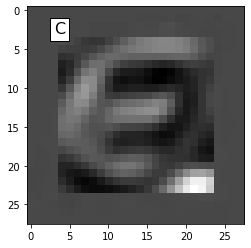

The actual alphabet is: C
The predicted alphabet is: C


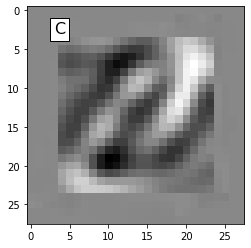

The actual alphabet is: U
The predicted alphabet is: U


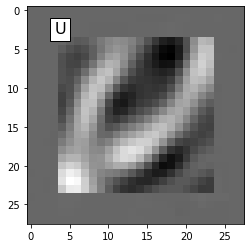

The actual alphabet is: J
The predicted alphabet is: J


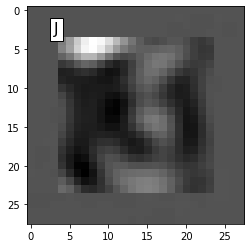

The actual alphabet is: O
The predicted alphabet is: O


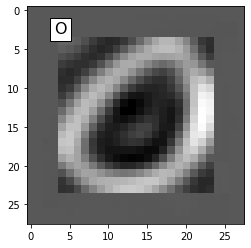

The actual alphabet is: U
The predicted alphabet is: U


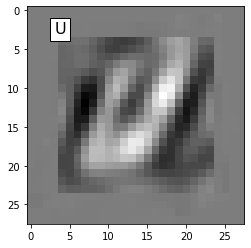

The actual alphabet is: M
The predicted alphabet is: M


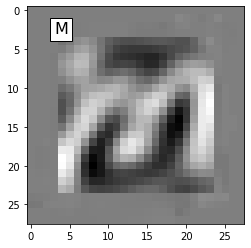

In [100]:
error = 0
for i in np.random.randint(0, high=len(Y_PCA_test), size=(50,)):
    # grab the image and classify it

    image = X_PCA_test[i]
    image2 = pca.inverse_transform(image)
    

    ans = Y_PCA_test[i]
    image = image.reshape(1,-1)
    ans = ans.reshape(1,-1)
#     print(ans)
    prediction = cos_knn_testing(3, image, ans, X_PCA_train[:50000,:], Y_PCA_train[:50000])
    if prediction != ans:
        error += 1
    
    imgdata = np.array(image, dtype='float')

    
    pixels = image2.reshape(28,28)
    plt.imshow(pixels,cmap='gray')
    plt.annotate(chr(prediction+65),(3,3),bbox={'facecolor':'white'},fontsize=16)
    print("The actual alphabet is: {}".format(chr(ans[0]+65)))
    print("The predicted alphabet is: {}".format(chr(prediction+65)))

    plt.show()

In [104]:
print('Testing on ranodm 50 samples yielded: ', (50-error)*2.0)

Testing on ranodm 50 samples yielded:  96.0
